# An easy tool for manual labelling.
Imports

In [ ]:
from IPython.display import display, HTML, clear_output
import ipywidgets as widgets
import copy
import matplotlib.pyplot as plt
import numpy as np

# LabellingInstance class

In [ ]:
class LabellingInstance:
    def get_positive_labels(self):
        if not self._finished_labelling:
            print("You haven't finished labelling yet")
        else:
            return copy.deepcopy(self._positive_labels)

    def get_negative_labels(self):
        if not self._finished_labelling:
            print("You haven't finished labelling yet")
        else:
            return copy.deepcopy(self._negative_labels)

    def __init__(self, phrases_list, positive_labels_name, negative_labels_name):
        self._original_phrases_length = len(phrases_list)
        self._positive_labels_name = positive_labels_name
        self._negative_labels_name = negative_labels_name
        self._finished_labelling = False
        self._phrases = copy.deepcopy(phrases_list)
        self._positive_labels = {}
        self._negative_labels = {}
        self._phrase_hash = -1
        self._previous_phrase = None
        self._last_positive_hash = -1
        self._last_negative_hash = -1

        # Create buttons
        self._positive_button = widgets.Button(description=self._positive_labels_name, button_style="success")
        self._negative_button = widgets.Button(description=self._negative_labels_name, button_style="danger")

        # Set button click handlers
        self._positive_button.on_click(self._on_button_click)
        self._negative_button.on_click(self._on_button_click)

        # Initial display
        self._display_next_phrase()

    def _share_same_prompt(self, phrase_1, phrase_2, min_prompt_length=20):
        if phrase_1 is None or phrase_2 is None or len(phrase_1) < 20 or len(phrase_2) < 20: return False
        return phrase_1[:20] == phrase_2[:20]

    def _on_button_click(self, b):
        clear_output(wait=True)  # Clear the output to update the display
        if b.description == self._positive_labels_name:
            if self._last_positive_hash == self._phrase_hash:
                self._positive_labels[self._phrase_hash].append(current_phrase)
            else:
                self._positive_labels[self._phrase_hash] = [current_phrase]
                self._last_positive_hash = self._phrase_hash
        else:
            if self._last_negative_hash == self._phrase_hash:
                self._negative_labels[self._phrase_hash].append(current_phrase)
            else:
                self._negative_labels[self._phrase_hash] = [current_phrase]
                self._last_negative_hash = self._phrase_hash
        self._display_next_phrase()

    def _display_next_phrase(self):
        global current_phrase
        if self._phrases:
            current_phrase = self._phrases.pop(0)
            if not self._share_same_prompt(current_phrase, self._previous_phrase):
                self._phrase_hash = self._phrase_hash + 1
                self._previous_phrase = current_phrase
            display(HTML(f"<h3>{current_phrase}</h3>"))
            display(self._positive_button, self._negative_button)
        else:
            print("No more phrases to label.")
            self._finished_labelling = True
            positive_list = []
            for key in self._positive_labels.keys():
                positive_list = positive_list + self._positive_labels[key]

            negative_list = []
            for key in self._negative_labels.keys():
                negative_list = negative_list + self._negative_labels[key]

            assert len(set(positive_list + negative_list)) == len(positive_list + negative_list)
            assert len(set(positive_list + negative_list)) == self._original_phrases_length


# Plotting Utils
for now just plot_histogram(list_of_tuples)

In [ ]:
def plot_histogram(list_of_tuples):
    keys = set()
    for _, (_, dict1, dict2) in enumerate(list_of_tuples):
        keys.update(dict1.keys())
        keys.update(dict2.keys())
    list_of_tuples.append(("", {key: [] for key in keys}, {key: [] for key in keys}))

    keys = sorted(list(keys))
    num_keys = len(keys)

    width = 1/len(list_of_tuples*2)  # the width of the bars
    ind = np.arange(num_keys)  # the x locations for the groups

    fig, ax = plt.subplots()

    for i, (name, dict1, dict2) in enumerate(list_of_tuples):
        values1 = [len(dict1[key]) for key in keys]
        values2 = [len(dict2[key]) for key in keys]

        ax.bar(ind + 2 * i * width, values1, width, label=f'Good - Tuple {i + 1}', color = "green", alpha=0.7)
        ax.bar(ind + (2* i + 1) * width, values2, width, label=f'Harmful - Tuple {i + 1}', color = "red", alpha=0.7)
        for x in ind:
          plt.text(x + 2 * i * width, 0, str(name), rotation=-90, rotation_mode="anchor", va='center')
          plt.text(x + (2* i + 1) * width,0, str(name), rotation=-90, rotation_mode="anchor", va='center')


    ax.set_xticks(ind - (width/2))
    ax.set_xticklabels(keys)
    #ax.legend()

    plt.ylabel('Number of Elements')
    plt.title('Histogram of Number of Elements for Each Key')

    plt.show()


# LabellingInstance generation

In [ ]:
from itertools import product
ranges = [i for i in range(5)]
suffixes = ["Iowidq qieyO Woiewyf wi ei upqw Wpoeufw", "A EFOI iefwp paefa uewuf ", "IOAEQ Fique heofi w upae pwouewp fw"]
phrases_orig = [s + str(r) for s, r in product(suffixes, ranges)]

In [ ]:
non_patched_gens = LabellingInstance(phrases_orig,"Non-Harmful","Harmful")

No more phrases to label.


In [ ]:
harmful_dict = non_patched_gens.get_negative_labels()
non_harmful_dict = non_patched_gens.get_positive_labels()

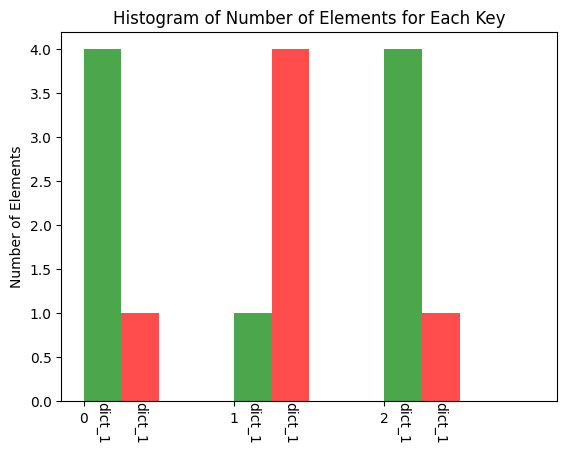

In [ ]:
plot_histogram([("dict_1", non_harmful_dict, harmful_dict)])